In [116]:
# Load the CSV file
base = '../rcie-system-metrics-data/'
domain = '2023-06-12_11-33-10_rcie-api-default/'
file = 'metrics-with-output-and-standardized-unit.csv'
file_path = base + domain + file

In [117]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn import svm

In [118]:
col_names = ["time","timestamp","cpu_usage","memory_usage","bandwidth_inbound","bandwidth_outbound","tps","tps_error","response_time","status"]

# Load dataset
pima = pd.read_csv(file_path, skiprows=1, header=None, names=col_names)
pima.head()

,time,timestamp,cpu_usage,memory_usage,bandwidth_inbound,bandwidth_outbound,tps,tps_error,response_time,status
0,2023-05-25 18:13:15,1685013195000,0.010,0.374,5.63,4.91,0.236,0.0,136.0,0
1,2023-05-25 18:13:20,1685013200000,0.010,0.374,5.59,4.85,0.236,0.0,137.0,0
2,2023-05-25 18:13:25,1685013205000,0.010,0.374,5.60,4.88,0.218,0.0,73.4,0
3,2023-05-25 18:13:30,1685013210000,0.004,0.374,5.60,4.88,0.218,0.0,72.7,0
4,2023-05-25 18:13:35,1685013215000,0.252,0.394,10500.00,9030.00,0.455,0.0,730.0,0


In [119]:
# Split dataset in features and target variable
feature_cols = ["cpu_usage","memory_usage","bandwidth_inbound","bandwidth_outbound","tps","tps_error","response_time"]
target_col = ["status"]
X = pima[feature_cols] # Features
y = pima[target_col] # Target variable

In [120]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [121]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

### Decision Tree Classification

In [122]:
# Create Decision Tree Classifier object
clf_df = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf_df = clf_df.fit(X_train,y_train)

In [123]:
y_pred_df = clf_df.predict(X_test)

accuracy_df = accuracy_score(y_test, y_pred_df)
precision_df = precision_score(y_test, y_pred_df)
recall_df = recall_score(y_test, y_pred_df)

print("Accuracy:", accuracy_df)
print("Precision:", precision_df)
print("Recall:", recall_df)

Accuracy: 0.9513343799058085
Precision: 0.7368421052631579
Recall: 0.7241379310344828


#### Optimizing Decision Tree Performance

In [124]:
# Optimizing Decision Tree Performance
# Create Decision Tree classifer object
clf_df_op = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf_df_op = clf_df_op.fit(X_train,y_train)

In [125]:
y_pred_df_op = clf_df_op.predict(X_test)

accuracy_df_op = accuracy_score(y_test, y_pred_df_op)
precision_df_op = precision_score(y_test, y_pred_df_op)
recall_df_op = recall_score(y_test, y_pred_df_op)

print("Accuracy:", accuracy_df_op)
print("Precision:", precision_df_op)
print("Recall:", recall_df_op)

Accuracy: 0.9529042386185244
Precision: 0.6794871794871795
Recall: 0.9137931034482759


#### Visualizing Confusion Matrix using Heatmap

In [126]:
cnf_matrix_df_op = confusion_matrix(y_test, y_pred_df_op)
cnf_matrix_df_op

array([[554,  25],
       [  5,  53]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

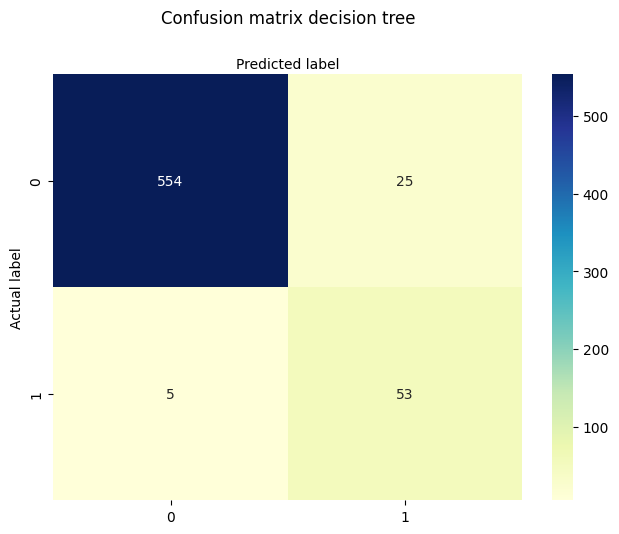

In [127]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_df_op), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix decision tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### K-Nearest Neighbors Classification

In [128]:
# Create K-Nearest Neighbors classifier object
knn = KNeighborsClassifier(n_neighbors=3)

# Train K-Nearest Neighbors classifier
knn.fit(X_train, y_train)

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [129]:
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)

print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)

Accuracy: 0.9623233908948194
Precision: 0.8269230769230769
Recall: 0.7413793103448276


#### Using Cross Validation to Get the Best Value of k

In [130]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: Data

Text(0, 0.5, 'Accuracy Score')

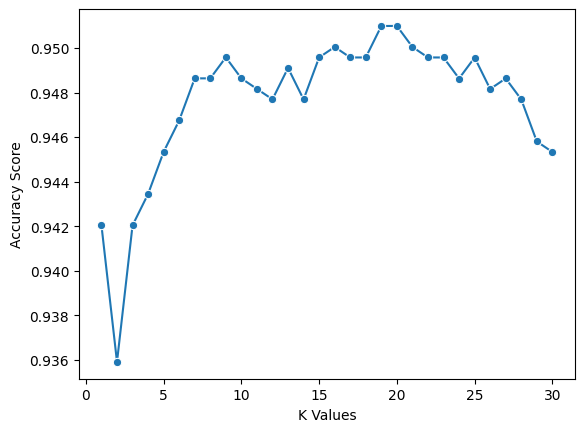

In [131]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [132]:
# More Evaluation Metrics
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)

knn.fit(X_train, y_train)

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=20)

In [133]:
y_pred_knn_op = knn.predict(X_test)

accuracy_knn_op = accuracy_score(y_test, y_pred_knn_op)
precision_knn_op = precision_score(y_test, y_pred_knn_op)
recall_knn_op = recall_score(y_test, y_pred_knn_op)

print("Accuracy:", accuracy_knn_op)
print("Precision:", precision_knn_op)
print("Recall:", recall_knn_op)

Accuracy: 0.945054945054945
Precision: 0.96
Recall: 0.41379310344827586


#### Visualizing Confusion Matrix using Heatmap

In [149]:
cnf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
cnf_matrix_knn

array([[570,   9],
       [ 15,  43]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

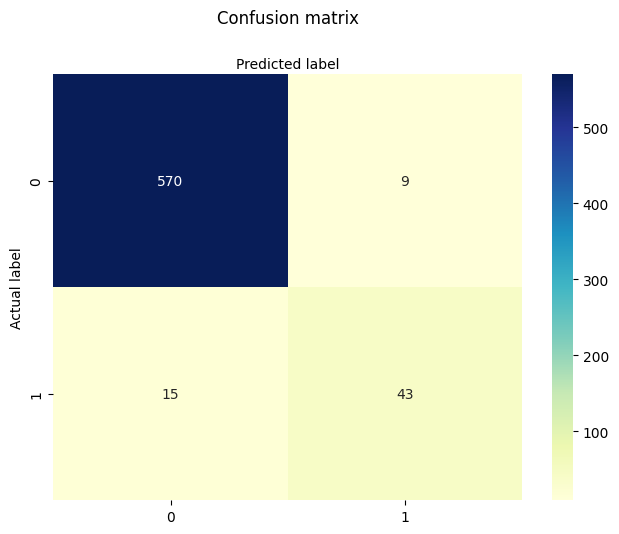

In [150]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Logistic Regression

In [136]:
# Instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# Fit the model with data
logreg.fit(X_train, y_train)

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=16)

In [137]:
y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)

print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)

Accuracy: 0.9529042386185244
Precision: 0.8181818181818182
Recall: 0.6206896551724138


#### Visualizing Confusion Matrix using Heatmap

In [138]:
cnf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
cnf_matrix_logreg

array([[571,   8],
       [ 22,  36]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

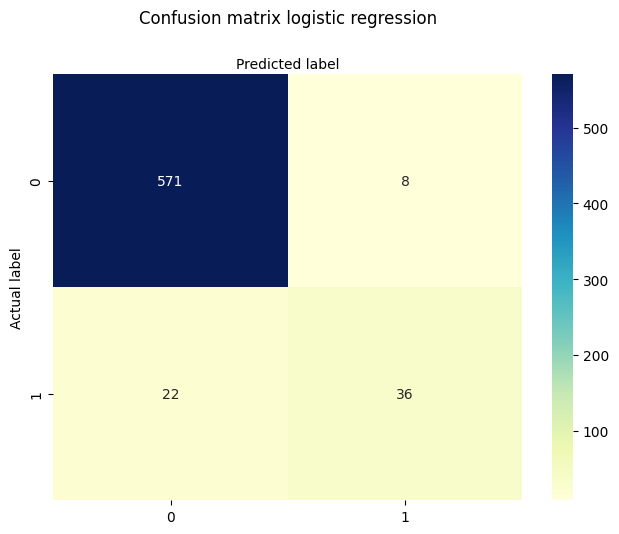

In [139]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_logreg), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix logistic regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### ROC Curve

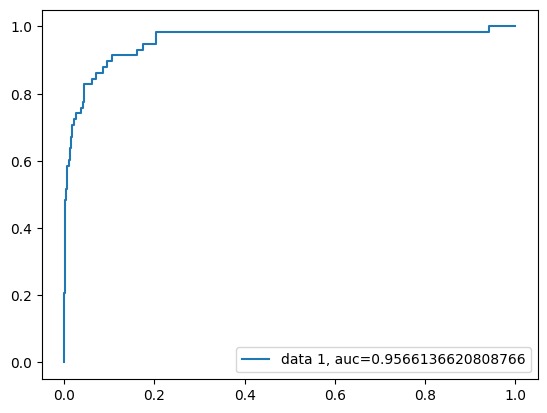

In [140]:
y_pred_proba_logreg = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_logreg)
auc = roc_auc_score(y_test, y_pred_proba_logreg)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Support Vector Machines

In [141]:
# Create a svm Classifier
clf_svm = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf_svm.fit(X_train, y_train)

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [142]:
y_pred_svm = clf_svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)

Accuracy: 0.9591836734693877
Precision: 0.9210526315789473
Recall: 0.603448275862069


#### Visualizing Confusion Matrix using Heatmap

In [143]:
cnf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
cnf_matrix_svm

array([[576,   3],
       [ 23,  35]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

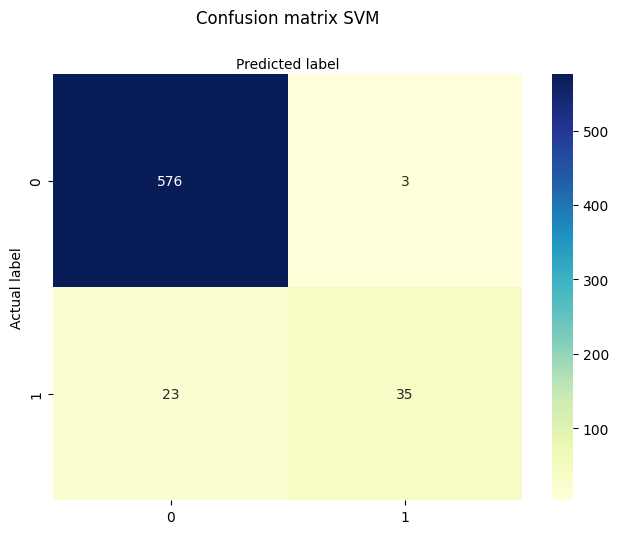

In [144]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Neural Networks

In [145]:
# Create a MLP Classifier
clf_nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

# Train the model using the training sets
clf_nn.fit(X_train, y_train)

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [146]:
y_pred_nn = clf_nn.predict(X_test)

accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)

print("Accuracy:", accuracy_nn)
print("Precision:", precision_nn)
print("Recall:", recall_nn)

Accuracy: 0.9089481946624803
Precision: 0.0
Recall: 0.0


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Visualizing Confusion Matrix using Heatmap

In [147]:
cnf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
cnf_matrix_nn

array([[579,   0],
       [ 58,   0]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

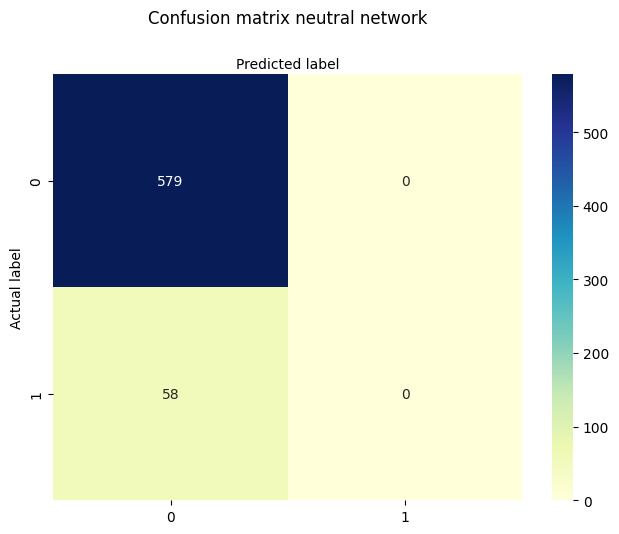

In [148]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix neutral network', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Long Short-Term Memory (LSTM) Networks

In [184]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [185]:
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

y_train_lstm = y_train.values
y_test_lstm = y_test.values

In [186]:
n_features = X.shape[1]

lstm = Sequential()
lstm.add(LSTM(50, activation='relu', input_shape=(None, n_features)))
lstm.add(Dense(1, activation='sigmoid'))

lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm.fit(X_train_lstm, y_train_lstm, epochs=50, verbose=0)

In [187]:
y_pred_lstm = lstm.predict(X_test_lstm)
y_pred_lstm = (y_pred_lstm > 0.5).astype(int)

accuracy_lstm = accuracy_score(y_test_lstm, y_pred_lstm)
precision_lstm = precision_score(y_test_lstm, y_pred_lstm)
recall_lstm = recall_score(y_test_lstm, y_pred_lstm)

print("Accuracy:", accuracy_lstm)
print("Precision:", precision_lstm)
print("Recall:", recall_lstm)

20/20 [==============================] - 0s 2ms/step
Accuracy: 0.9372056514913658
Precision: 0.65
Recall: 0.6724137931034483


#### Visualizing Confusion Matrix using Heatmap

In [188]:
cnf_matrix_lstm = confusion_matrix(y_test_lstm, y_pred_lstm)
cnf_matrix_lstm

array([[558,  21],
       [ 19,  39]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

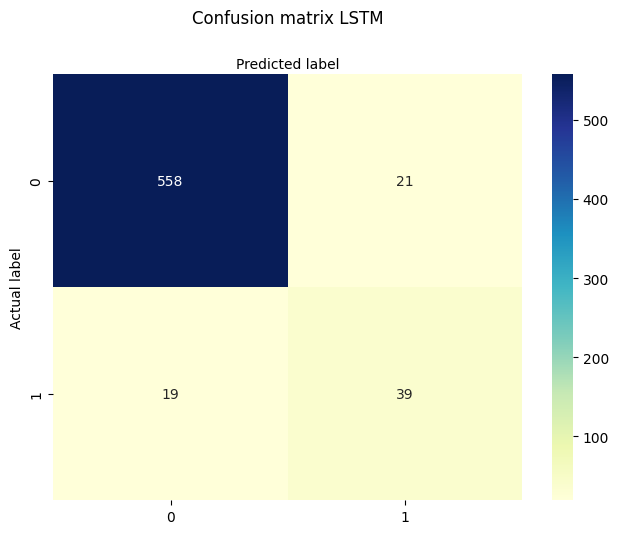

In [189]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_lstm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix LSTM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')